<figure>
<center>

<img src='https://drive.google.com/uc?export=view&id=1KSVdUoqJx23tOaOGWnhaCQwPvdELAy0o' width='50%' />
<figcaption> </figcaption></center>
</figure>

<div class="alert alert-success">
    <h1 align="center"> Senior-AI-Software-Engineer for Snapp  </h1>
    <h2 align="center">  </h1>
    <h3 align="center">Task: Pima_Indians_Diabetes dataset </h3>
    <h4 align="center"><a href="abbassbiniaz@gmail.com">Abbass  Biniaz</a></h4>
</div>

## Introduction

<h6> 
● Create a repository on your GitHub

● Make the dataset imbalance with 10% of the True (1) label

● Write your code on python or jupyter file

● Feature Engineering step

● Feature Selection step

● Train an ML model

● Evaluate and Print the result on test data.

## Data

PIMA INDIANS DIABETES DATASET
The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):

 Pregnancies (number of times pregnant),

 Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

 Blood Pressure (Diastolic Blood Pressure in mmHg),

 Skin Thickness (Triceps skin fold thickness in mm),

 Insulin (2 h serum insulin in mu U/ml),

 BMI (Body Mass Index in kg/m2),

 Age (years),

 Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')


![](https://drive.google.com/file/d/1hKGvwxKwTXFAOQBwuzxL5UO_zGVqJcfB)

# Load Libraries and prepare datasets

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
# %cd '/content/drive/My Drive/Radial/task/task1/code'
path = F'/content/drive/My Drive/projects/Snapp/'
import os, sys
os.chdir(path)

Mounted at /content/drive


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
import numpy as np
import  sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pima_raw=pd.read_csv('diabetes.csv', header=0 ,sep=',' )
pima=pima_raw.copy()

In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(pima.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
pima.shape

(768, 9)

In [7]:
# Check missing values

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59916aa650>,
      dtype=object)

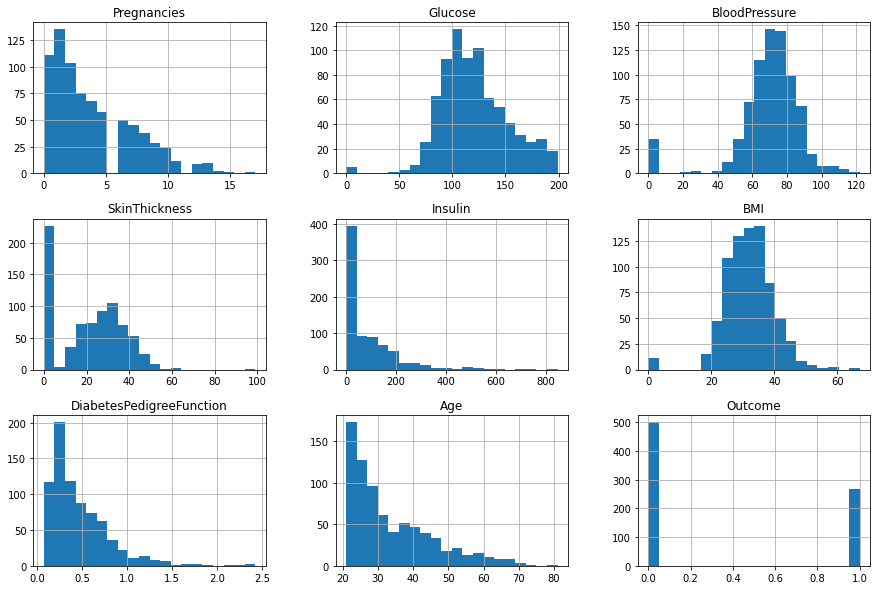

In [8]:
pima.hist(bins=20,figsize=(15,10))

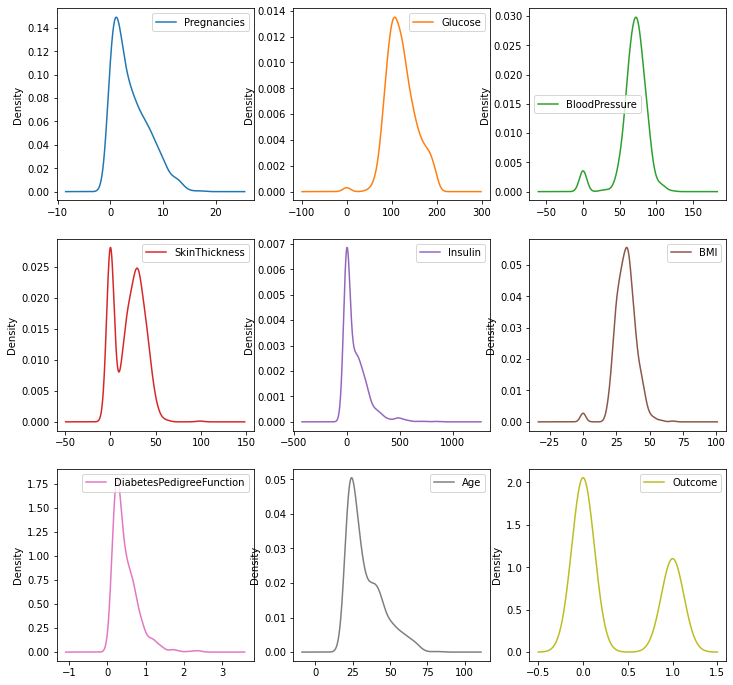

In [9]:
pima.plot(kind='density', subplots=True, layout=(3,3), figsize=(12, 12), sharex=False)
plt.show()

Visual inspection for non-linearity of data. 

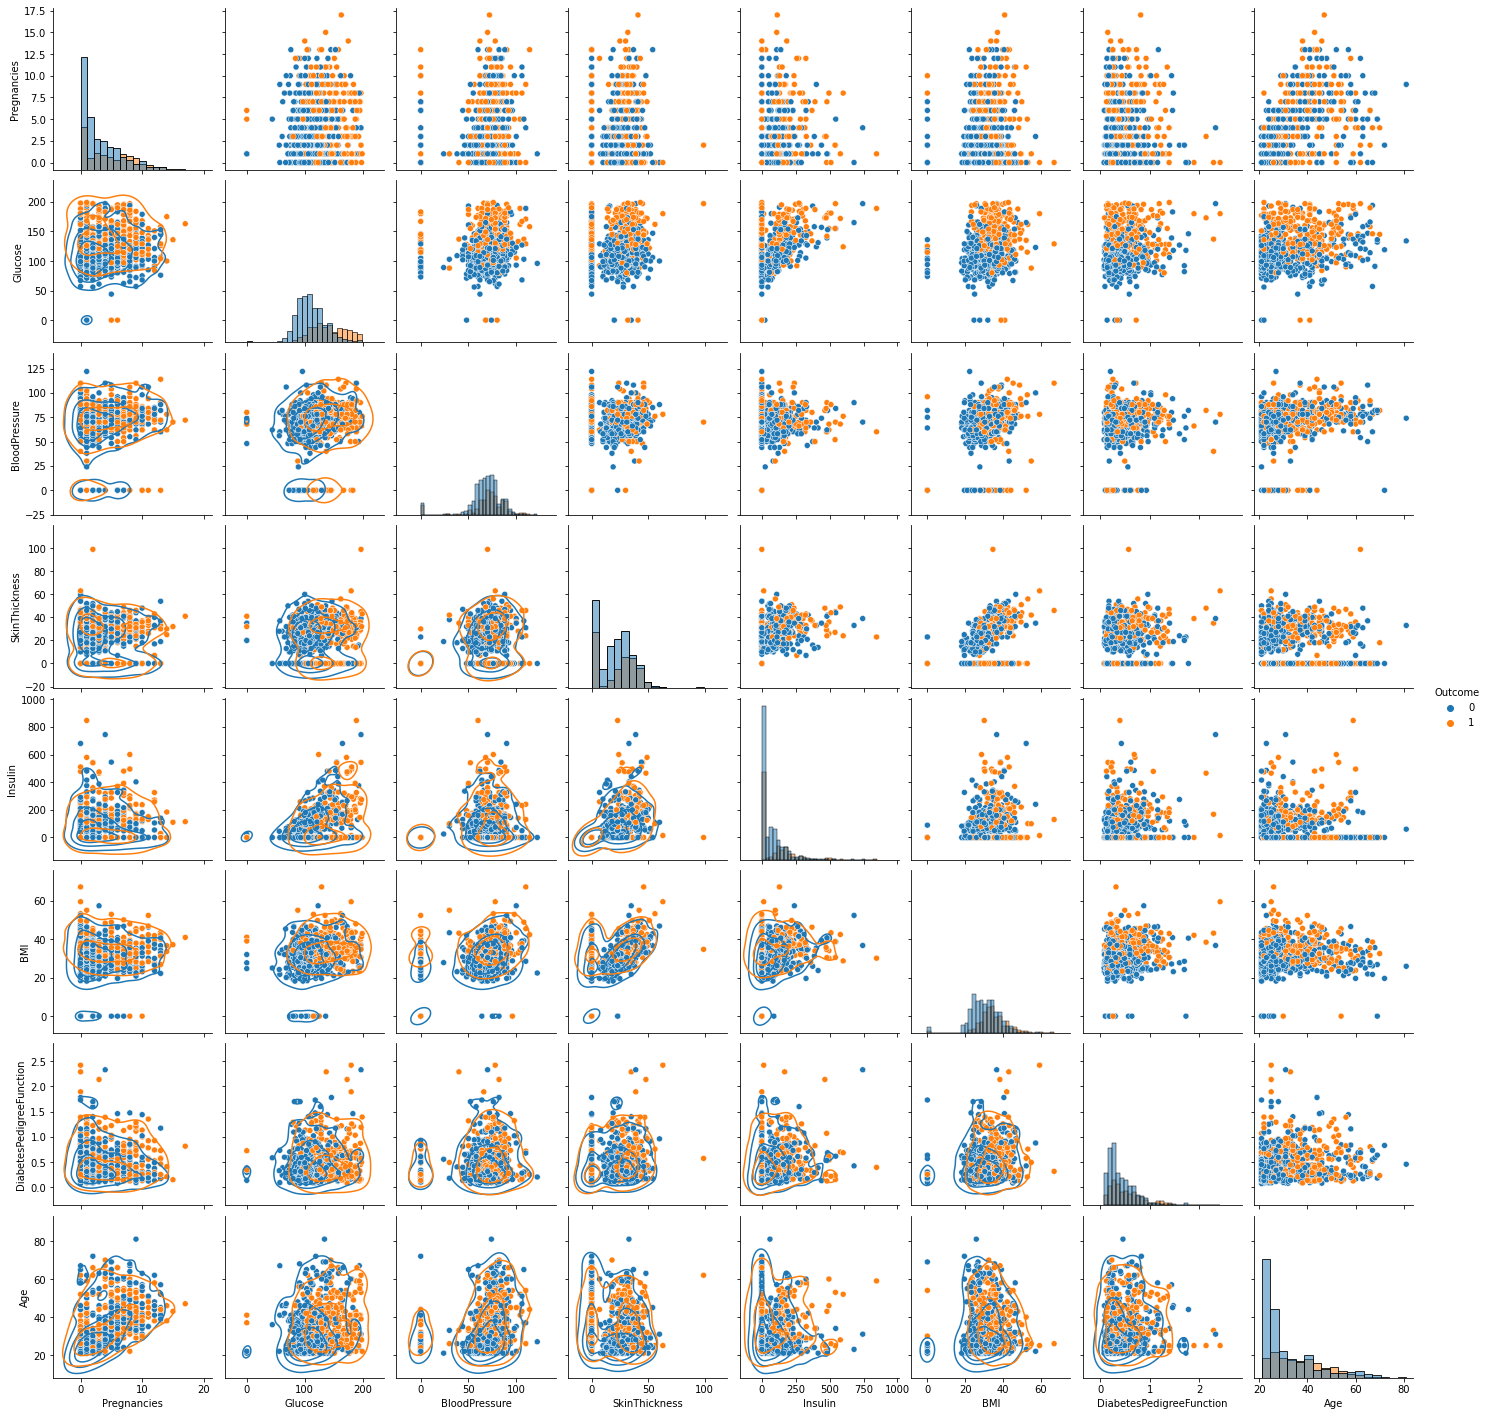

In [10]:
g=sns.pairplot(pima,kind='scatter',hue='Outcome',diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [11]:
print(pima.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [12]:
pima.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [13]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
# Check missing values

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#Finding the Features which have the most Linear correlation with outcome in sorted in non-ascending order.
correlation_matrix=pima.corr(method='pearson')
correlation_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

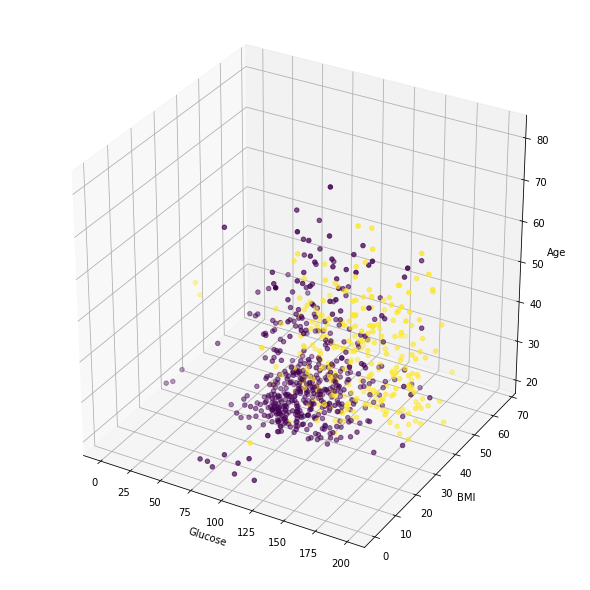

In [16]:
from mpl_toolkits.mplot3d import Axes3D
#sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = pima['Glucose']
y = pima['BMI']
z = pima['Age']

ax.scatter(x, y, z, c=pima['Outcome'], marker='o',)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()

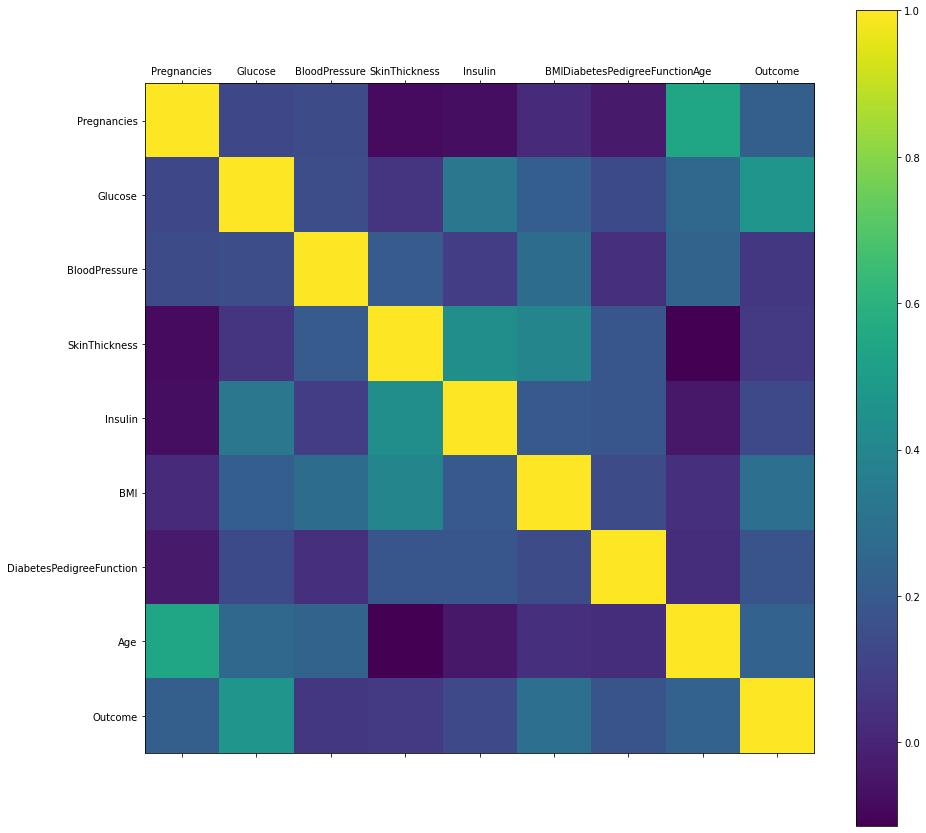

In [17]:
from matplotlib import rc_params

#plt.figure(figsize=(10,10))
#plt.matshow(correlation_matrix,fignum=1)

alpha = list(pima.columns)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5977325190>,
      dtype=object)

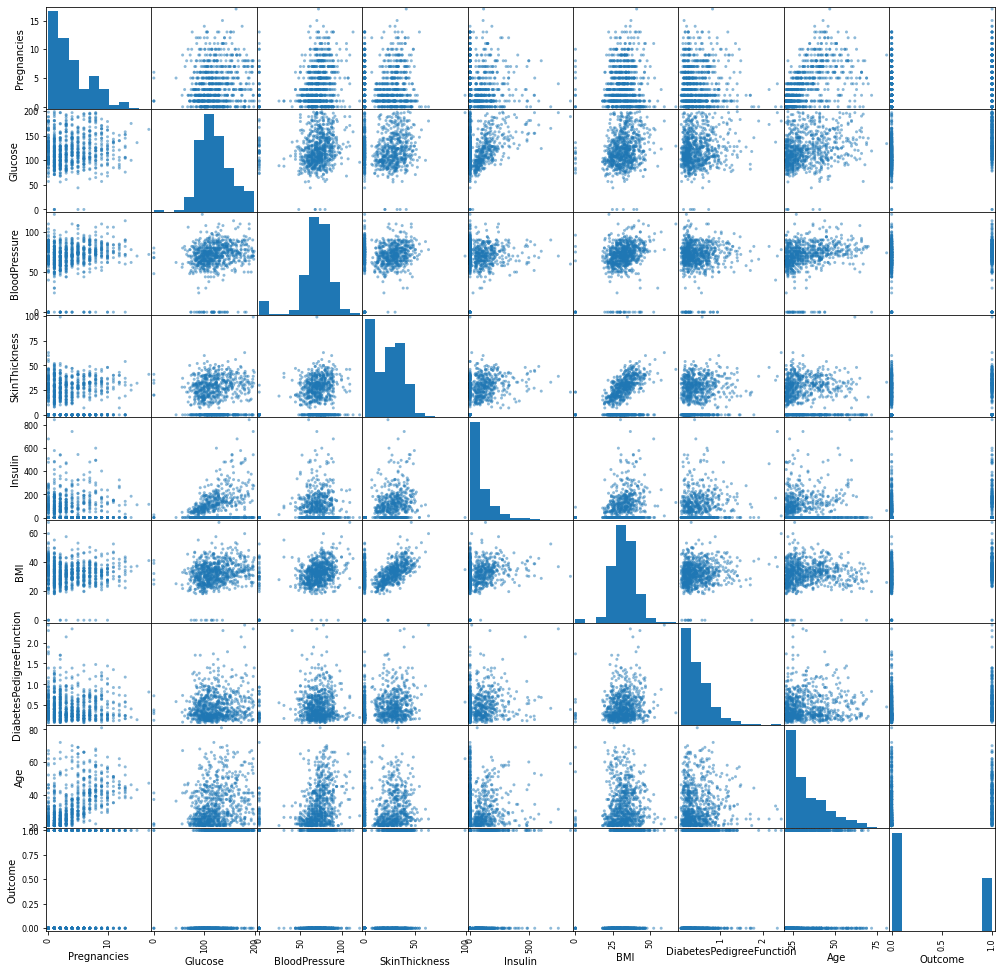

In [18]:
pd.plotting.scatter_matrix(pima,figsize=(17,17))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

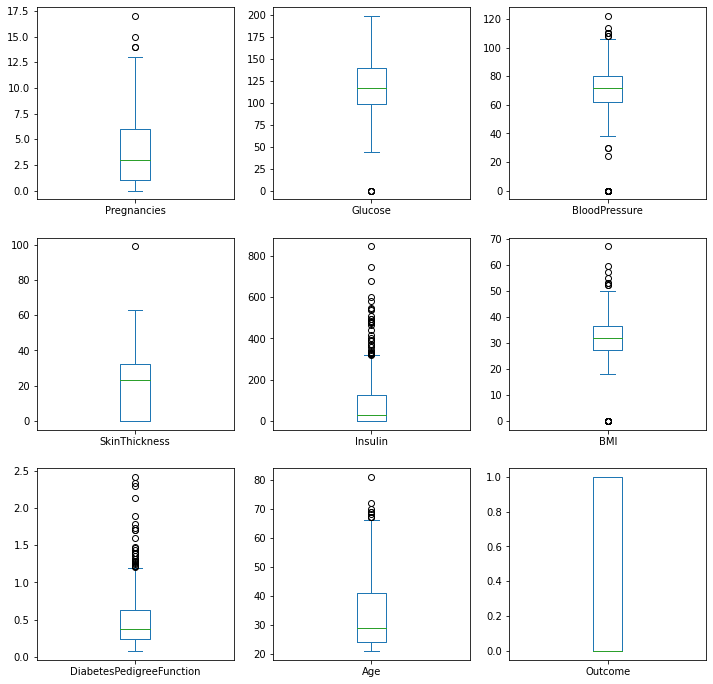

In [48]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))

# Impute missing values (or outliers) for label 'Outcome'==0

In [49]:
# Replace the missing values (outliers) with median for label 'Outcome'==0
pima1=pima.copy()
median_=(pima1['Glucose'][(pima1['Outcome']==0) & (pima1['Glucose']>40)]).median()
pima1['Glucose'].mask((pima1['Outcome']==0) & (pima1['Glucose']<=40),median_,inplace=True)

median_=(pima1['BloodPressure'][(pima1['Outcome']==0) & (pima1['BloodPressure']>40)]).median()
pima1['BloodPressure'].mask((pima1['Outcome']==0) & (pima1['BloodPressure']<=40),median_,inplace=True)

median_=(pima1['BMI'][(pima1['Outcome']==0) & (pima1['BMI']>10)]).median()
pima1['BMI'].mask((pima1['Outcome']==0) & (pima1['BMI']<=10),median_,inplace=True)

median_=(pima1['Insulin'][(pima1['Outcome']==0) & (pima1['Insulin']!=0)]).median()
pima1['Insulin'].mask((pima1['Outcome']==0) & (pima1['Insulin']==0),median_,inplace=True)


print(pima1["BloodPressure"][pima1['Outcome']==0].min())

44


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

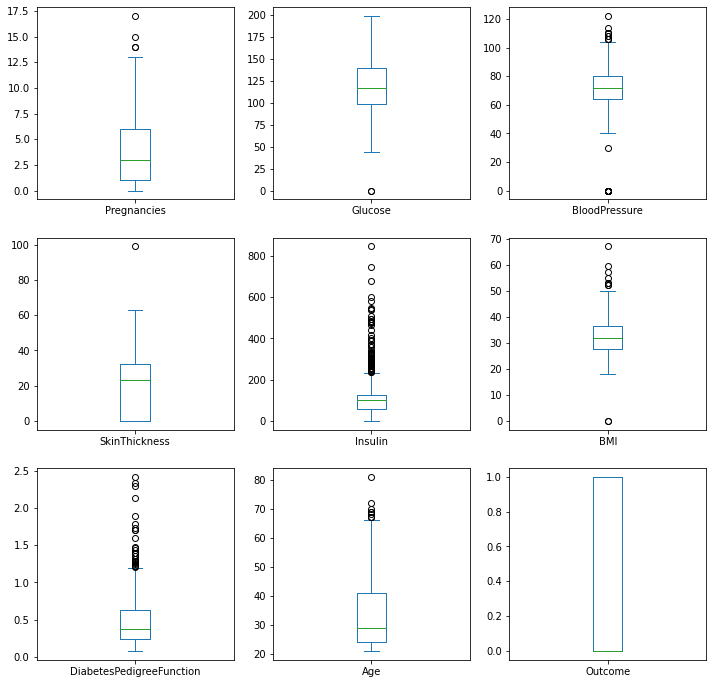

In [41]:
pima1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))

# Pima without outliers for label 'Outcome'==1

In [50]:
# the below code is written to remove outliers only from 'Outcome' label 1 and label 0
# pima_imputed=pima1[pima1['Glucose']>40]
# pima_imputed=pima_imputed[pima_imputed['BloodPressure']>40]
# pima_imputed=pima_imputed[pima_imputed['BMI']>10]
# pima_imputed=pima_imputed[pima_imputed['Insulin']!=0]
# print(pima_imputed["Outcome"].value_counts())


# the below code is written to remove outliers only from 'Outcome' label 1
#pima_imputed=pima.loc[(pima['Glucose']!=0)&(pima['BloodPressure']!=0)&(pima['BMI']!=0)&(pima['Insulin']!=0)]
pima_imputed=pima1.loc[(pima1['Outcome']==0)|((pima1['Glucose']>40)&(pima1['BloodPressure']>40)&(pima1['BMI']>10)&(pima1['Insulin']!=0))]
print('number of removed outliers: ',((pima1['Glucose']<=40)|(pima1['BloodPressure']<=40)|(pima1['BMI']<=10)|(pima1['Insulin']==0)).sum())
print(pima_imputed["Outcome"].value_counts())

number of removed outliers:  140
0    500
1    128
Name: Outcome, dtype: int64


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

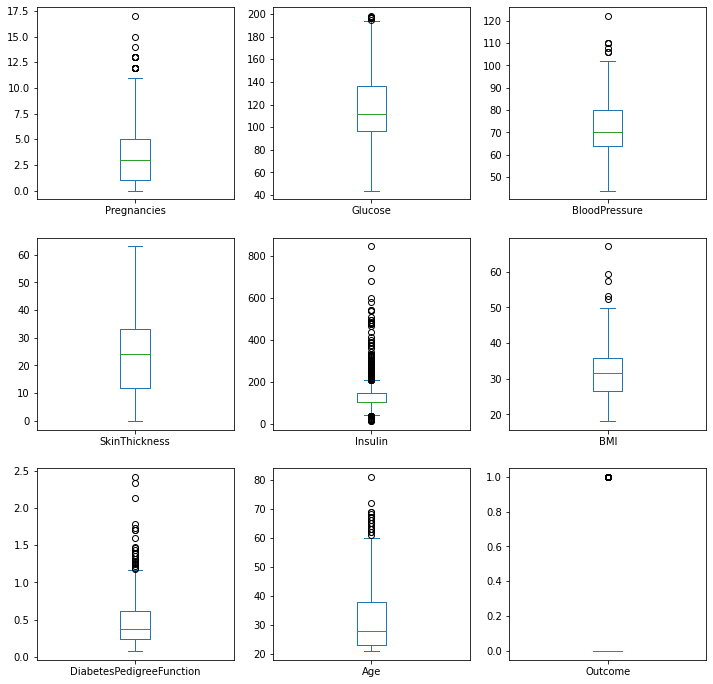

In [51]:
pima_imputed.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))

In [52]:
pima_imputed['Outcome'].value_counts()

0    500
1    128
Name: Outcome, dtype: int64

In [57]:
correlation_matrix=pima_imputed.corr(method='pearson')
correlation_matrix
       

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126661,0.198488,-0.042448,0.035422,0.008179,-0.027182,0.584437,0.152744
Glucose,0.126661,1.000000,0.199912,0.195869,0.520555,0.218046,0.157412,0.261979,0.481292
BloodPressure,0.198488,0.199912,1.000000,0.082690,0.043429,0.300250,0.014232,0.311042,0.124123
SkinThickness,-0.042448,0.195869,0.082690,1.000000,0.252622,0.507295,0.180997,-0.084323,0.356019
Insulin,0.035422,0.520555,0.043429,0.252622,1.000000,0.242510,0.162292,0.107323,0.375637
BMI,0.008179,0.218046,0.300250,0.507295,0.242510,1.000000,0.165553,0.033208,0.281063
DiabetesPedigreeFunction,-0.027182,0.157412,0.014232,0.180997,0.162292,0.165553,1.000000,0.057933,0.227562
Age,0.584437,0.261979,0.311042,-0.084323,0.107323,0.033208,0.057933,1.000000,0.168093
Outcome,0.152744,0.481292,0.124123,0.356019,0.375637,0.281063,0.227562,0.168093,1.000000


In [58]:
correlation_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.481292
Insulin                     0.375637
SkinThickness               0.356019
BMI                         0.281063
DiabetesPedigreeFunction    0.227562
Age                         0.168093
Pregnancies                 0.152744
BloodPressure               0.124123
Name: Outcome, dtype: float64

#	Making the dataset imbalance with 10% of the True (1) label

In [59]:
def imbalancer(pima):
  n_cases=pima['Outcome'].value_counts()
  print('Real number of negative and positive cases:\n',n_cases)
  n_10percent=n_cases[0]//9
  print('the maximum number of label1 for new dataset  with 10% imbalance:',n_10percent)
  test_size_10percent=n_10percent/n_cases[1]
  print('test_size_10percent to randomly select from label1',test_size_10percent)

  _,pima_10percent_1=train_test_split(pima[pima['Outcome']==1],test_size=test_size_10percent,random_state=2)
  pima_90percent_0=pima[pima['Outcome']==0]
  pima_impbalance=pd.concat([pima_90percent_0,pima_10percent_1],axis=0)#concatenated 10% of positives and 90% of negatives
  print('concatenated 10% of positives and 90% of negatives:\n')
  print('pima_imbalanced[\'Outcome\'].value_counts():\n',pima_impbalance['Outcome'].value_counts())

  return pima_impbalance
#pima_impbalance=imbalancer(pima)
pima_imputed_impbalance=imbalancer(pima_imputed)
#pima_impbalance.info()
pima_imputed_impbalance.info()


Real number of negative and positive cases:
 0    500
1    128
Name: Outcome, dtype: int64
the maximum number of label1 for new dataset  with 10% imbalance: 55
test_size_10percent to randomly select from label1 0.4296875
concatenated 10% of positives and 90% of negatives:

pima_imbalanced['Outcome'].value_counts():
 0    500
1     55
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 1 to 8
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               555 non-null    int64  
 1   Glucose                   555 non-null    int64  
 2   BloodPressure             555 non-null    int64  
 3   SkinThickness             555 non-null    int64  
 4   Insulin                   555 non-null    float64
 5   BMI                       555 non-null    float64
 6   DiabetesPedigreeFunction  555 non-null    float64
 7   Age                       555 non-

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

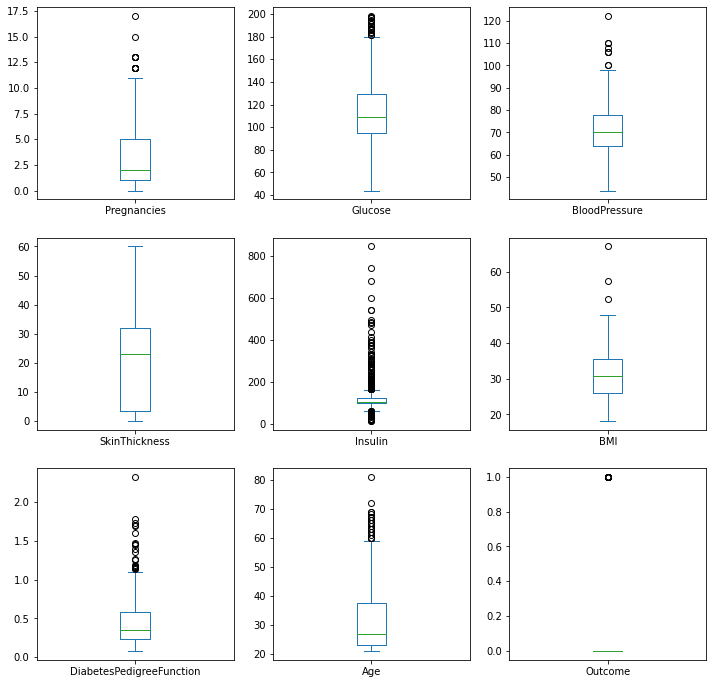

In [60]:
pima_imputed_impbalance.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))

# Statistic tests: Logic Regression

In [69]:
#1st Iteration - 8 variables

columns=list(pima_imputed_impbalance.columns)#["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
columns.remove('Outcome')
print(columns)
X=pima_raw[columns]
y=pima_raw.Outcome
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 May 2022   Pseudo R-squ.:                 0.05922
Time:                        22:23:58   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------